# Learning Curves
Code largely sourced from [https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb) and [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

In [1]:
from sklearn.model_selection import learning_curve

# Get/Create Some Data

In [2]:
from sklearn.model_selection import train_test_split
import ck_helpers.example_data as ckdata

(X, Y) = ckdata.AND(20, random_state=42)

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, train_size=0.75, random_state=42)

## Construct An "Estimator"
This can be anything that implements "fit" and "predict" methods.
SEE: [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

In [3]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()

## Supply Data And The "Estimator" To learning_curve
NOTE: There are many more parameters which can be found at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

In [4]:
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

curve = learning_curve(estimator=estimator, # An Estimator
                       X = X,               # X
                       y = Y,               # Y
                       n_jobs = -1,         # Number of processes to run in parallel. -1 means use all available processors.
                       return_times=True,   # Include training/testing clock time if you like
                       train_sizes = np.linspace(0.1, 1.0, 10)) # Specify a list of percentages of data that should be used for testing

In [5]:
# Decompose the curve object into it's constituent parts if you like
(train_sizes, train_scores_per_train_size, test_scores_per_train_size, fit_times_per_train_size, test_times_per_train_size) = curve

## Plot The Learning Curve

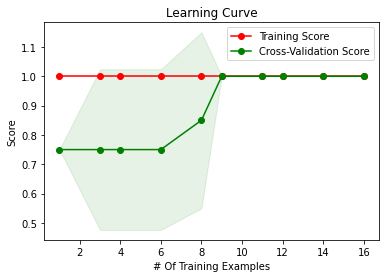

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Find Mean and Standard Deviation To Plot A Solid Line And Standard Deviation Window Respectively
train_scores_mean = np.mean(train_scores_per_train_size, axis=1)
train_scores_std = np.std(train_scores_per_train_size, axis=1)
test_scores_mean = np.mean(test_scores_per_train_size, axis=1)
test_scores_std = np.std(test_scores_per_train_size, axis=1)

# Plot The Training Data Learning Curve And Validation Data Curve
plt.plot(train_sizes, train_scores_mean, "o-", color="r")
plt.plot(train_sizes, test_scores_mean, "o-", color="g")
plt.legend(["Training Score", "Cross-Validation Score"])

# Plot The Training Data Standard Deviation Window
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)

# Plot The Validation Data Standard Deviation Windows
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)

# Label Things :)
plt.title("Learning Curve")
plt.xlabel("# Of Training Examples")
plt.ylabel("Score")

plt.show()